In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
article_names_music = [
    "Pop music",
    "Rock and roll",
    "Eric Clapton",
    "Rolling Stone",
    "Jazz",
    "Swing",
    "Classical music",
    "Ludwig van Beethoven",
    "Wolfgang Amadeus Mozart",
    "Joseph Haydn",
    "Country music",
    "Taylor Swift",
    "BTS (groupe)",
    "K-Pop",
    "Electronic music",
    "Daft Punk",
    "Paul Kalkbrenner",
    "Trumpet",
    "Music theory",
    "Fender",
    "Marshall Amplification",
    "Jimi Hendrix",
    "Bob Marley",
    "Edith Piaf",
    "Royal Albert Hall",
    "Piano",
    "Saxophone",
    "Punk rock",
    "Sex Pistols",
    "Nina Simone",
    "SCH (rapper)",
    "Music of Africa",
    "Major scale",
    "Major chord",
    "Minor chord",
    "AC/DC",
    "Red Hot Chili Peppers",
    "Funk rock",
    "James Brown",
    "Michael Jackson",
    "Stevie Wonder",
    "Travis Scott"
]

article_names_food = [
    "Food",
    "Cuisine",
    "Cooking",
    "Chef",
    "Gastronomy",
    "Recipe",
    "Ingredient",
    "Bread",
    "Cheese",
    "Butter",
    "Egg",
    "Milk",
    "Chocolate",
    "Coffee",
    "Tea",
    "Pizza",
    "Pasta",
    "Rice",
    "Sushi",
    "Curry",
    "Hamburger",
    "Sandwich",
    "Soup",
    "Salad",
    "Steak",
    "Barbecue",
    "Veganism",
    "Vegetarianism",
    "Fast food",
    "Street food",
    "Dessert",
    "Cake",
    "Ice cream",
    "Wine",
    "Beer",
    "Olive oil",
    "Spice",
    "Herb",
    "Michelin Guide",
    "World cuisine"
]

article_names_football = [
    "FIFA",
    "UEFA",
    "World Cup",
    "UEFA Champions League",
    "Premier League",
    "La Liga",
    "Serie A",
    "Bundesliga",
    "Ligue 1",
    "FC Barcelona",
    "Real Madrid CF",
    "Manchester United F.C.",
    "Liverpool F.C.",
    "Chelsea F.C.",
    "Paris Saint-Germain F.C.",
    "Juventus F.C.",
    "Bayern Munich",
    "Arsenal F.C.",
    "Borussia Dortmund",
    "Lionel Messi",
    "Cristiano Ronaldo",
    "Kylian Mbappé",
    "Neymar",
    "Zinedine Zidane",
    "Pelé",
    "Diego Maradona",
    "Ronaldinho",
    "David Beckham",
    "Thierry Henry",
    "Erling Haaland",
    "Luka Modrić",
    "Mohamed Salah",
    "Kevin De Bruyne",
    "Goalkeeper",
    "Offside (association football)",
    "Penalty kick",
    "Football tactics and formations",
    "VAR (association football)",
    "Referee (association football)",
    "Stadium"
]

article_names_china_taiwan = [
    '11th Legislative Yuan',
    '1943 Cairo Declaration',
    '1990 Guangzhou Baiyun airport collisions',
    '2004 ROC presidential election',
    '2008 Republic of China presidential election',
    '2022 Chinese military exercises around Taiwan',
    '2045 (game)',
    '20th Politburo of the Chinese Communist Party',
    "Administrative Procedure Law of the People's Republic of China",
    'Albania–Taiwan relations',
    'Anti-Secession Law',
    'Association for Relations Across the Taiwan Strait',
    'Australia–Taiwan relations',
    "Taiwan",
    "Chinese Civil War",
    "Political status of Taiwan",
    "Constitution of the Republic of China",
    "Lai Ching-te",
    "Democratic Progressive Party",
    "Chinese unification",
    "Chinese uniformity",
    "Taiwan independence movement",
    "Taiwan Area",
    "Taiwan Strait",
    "Political status of Taiwan",
    '2022 visit by Nancy Pelosi to Taiwan',
    'Accelerator-in-Chief',
    'All-Out Defense Mobilization Agency',
    'Anti-Communist Hero'
    '2045 (game)',
    "People's Liberation Army",
    "China Coast Guard",
    "People's Liberation Army Navy",
    "Grey-zone (international relations)",
    "Taipei",
    "Chinese Taipei",
    "One-party state",
]

article_names_china_taiwan_cut = [
    "Taipei",
    "Taiwan",
    '2022 Chinese military exercises around Taiwan',
    "Chinese Civil War",
    "Political status of Taiwan",
    "Chinese Taipei",
    "One-party state",
    '2008 Republic of China presidential election'
]
article_names_israel_palestine = [
    '2000–2006 Shebaa Farms conflict',
    '2005 Hezbollah cross-border raid',
    '2006 Israeli operation in Beit Hanoun',
    '2006–2007 economic sanctions against the Palestinian National Authority',
    '2008 breach of the Egypt–Gaza border',
    '2010 Gaza Freedom Flotilla',
    '2011 southern Israel cross-border attacks',
    '2012 attacks on Israeli diplomats',
    '2018–2019 Gaza border protests',
    '2021 Israel–Palestine crisis',
    '2022 Istanbul terror plot',
    '2025 al-Funduq shooting',
    'Agricultural research in Israel',
    'Allegations of war crimes against Israel',
    'Arab Liberation Front',
    'Assassination of Yitzhak Rabin',
    'Bank for International Settlements',
    'Blockout 2024',
    'China–Israel relations',
    'Death Shelters',
    'Fatah Sharif',
    'Gaza City',
    'Golan Heights',
    'Hezbollah involvement in the Syrian civil war',
    'ISBN (identifier)',
    'International Policy Institute for Counter-Terrorism',
    'Israel-Tajikistan relations',
    'Israeli–Palestinian conflict',
    'Zionism',
    'Benjamin Netanyahu',
    'Gaza genocide',
    'Gaza genocide recognition',
    'History of Hamas',
    'Israeli blockade of aid delivery to the Gaza Strip',
    'Killing of Nahida and Samar Anton',
    '2023 Israeli–Palestinian prisoner exchange',
    '2024 Gaza Strip polio epidemic',
    '2024 Jaffa shooting',
    '2024 pro-Palestinian protests on university campuses',
    '2025 Gaza Strip aid distribution killings'
]

article_names_israel_palestine_cut = [
    'Zionism',
    'Benjamin Netanyahu',
    'Gaza genocide',
    'Gaza genocide recognition',
    'History of Hamas',
    '2023 Israeli–Palestinian prisoner exchange',
    'Timeline of the Gaza war (3 October 2025 – present)',
    'January 2025 Gaza war ceasefire',
]

len(article_names_isreal_palestine)

40

In [82]:
import requests
import csv
import time
import re
from urllib.parse import quote_plus

# === CONFIG ===
WIKI_API = "https://en.wikipedia.org/w/api.php"
SLEEP_BETWEEN = 0.5  # polite pause between requests
USER_AGENT = "DH_Project/1.0 (https://www.epfl.ch/labs/dhlab/; maxime.garambois@epfl.ch)"

# === Helper Functions ===
def is_ip(user):
    """Detect if username looks like an IP address."""
    return bool(re.match(r"^\d{1,3}(\.\d{1,3}){3}$", user))


def fetch_all_revisions(title):
    """Fetch all revision metadata (user, timestamp, comment...) for a given Wikipedia article title."""
    session = requests.Session()
    session.headers.update({"User-Agent": USER_AGENT})

    params = {
        "action": "query",
        "format": "json",
        "prop": "revisions",
        "titles": title,
        "rvprop": "user|timestamp|ids|comment",
        "rvlimit": "500",            # Max per request
        "formatversion": "2",
        "rvslots": "main"
    }

    all_revs = []
    cont = {}

    while True:
        if cont:
            params.update(cont)
        resp = session.get(WIKI_API, params=params, timeout=30)
        resp.raise_for_status()

        # --- Defensive JSON decoding ---
        try:
            data = resp.json()
        except Exception as e:
            print(f"⚠️ JSON decode error for {title}: {e}")
            print(resp.text[:300])
            break

        pages = data.get("query", {}).get("pages", [])
        if not pages:
            break

        page = pages[0]
        revs = page.get("revisions", []) or []
        all_revs.extend(revs)

        # --- Continuation handling ---
        if "continue" in data:
            cont = data["continue"]
            time.sleep(SLEEP_BETWEEN)
        else:
            break

    return all_revs


# === DICTIONARY OF ARTICLE SETS ===
# (Make sure these variables are defined before running this script)
dicti = {
    "music": article_names_music,
    "food": article_names_food,
    "football": article_names_football,
    "china-taiwan": article_names_china_taiwan,           # corrected variable name
    "israel-palestine": article_names_israel_palestine
}


# === MAIN FUNCTION ===
def go(article_list, name):
    user_counts = {}
    OUT_CSV = f"wiki_editors_first10_{name}.csv"

    for title in article_list:
        print(f"\nFetching revisions for: {title}")
        revisions = fetch_all_revisions(title)
        print(f"  → Got {len(revisions)} revisions")

        for r in revisions:
            user = r.get("user", "(unknown)")
            user_counts[user] = user_counts.get(user, 0) + 1

    # === Write results to CSV ===
    with open(OUT_CSV, "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["username", "user_type", "edit_count"])
        for user, count in sorted(user_counts.items(), key=lambda x: -x[1]):
            user_type = "Anonymous (IP)" if is_ip(user) else "Registered"
            writer.writerow([user, user_type, count])

    print(f"\n✅ Wrote {len(user_counts)} unique users to {OUT_CSV}")


# === EXECUTION LOOP ===
for key, val in dicti.items():
    print(f"\n===== Processing category: {key.upper()} =====")
    go(val, key)


===== Processing category: MUSIC =====

Fetching revisions for: Pop music
  → Got 9650 revisions

Fetching revisions for: Rock and roll
  → Got 8824 revisions

Fetching revisions for: Eric Clapton
  → Got 10098 revisions

Fetching revisions for: Rolling Stone
  → Got 4116 revisions

Fetching revisions for: Jazz
  → Got 11818 revisions

Fetching revisions for: Swing
  → Got 406 revisions

Fetching revisions for: Classical music
  → Got 5604 revisions

Fetching revisions for: Ludwig van Beethoven
  → Got 9109 revisions

Fetching revisions for: Wolfgang Amadeus Mozart
  → Got 8531 revisions

Fetching revisions for: Joseph Haydn
  → Got 5334 revisions

Fetching revisions for: Country music
  → Got 8477 revisions

Fetching revisions for: Taylor Swift
  → Got 20317 revisions

Fetching revisions for: BTS (groupe)
  → Got 0 revisions

Fetching revisions for: K-Pop
  → Got 11 revisions

Fetching revisions for: Electronic music
  → Got 4387 revisions

Fetching revisions for: Daft Punk
  → Got 8

In [85]:
df_music = pd.read_csv('wiki_editors_first10_music.csv')
df_food = pd.read_csv('wiki_editors_first10_food.csv')
df_football = pd.read_csv('wiki_editors_first10_football.csv')
df_china = pd.read_csv('wiki_editors_first10_china-taiwan.csv')
df_israel = pd.read_csv('wiki_editors_first10_israel-palestine.csv')

df_music.to_csv('../datas/interim/wiki_editors_first10_music.csv', index=False)
df_food.to_csv('../datas/interim/wiki_editors_first10_food.csv', index=False)
df_football.to_csv('../datas/interim/wiki_editors_first10_football.csv', index=False)
df_china.to_csv('../datas/interim/wiki_editors_first10_china-taiwan.csv', index=False)
df_israel.to_csv('../datas/interim/wiki_editors_first10_israel-palestine.csv', index=False)

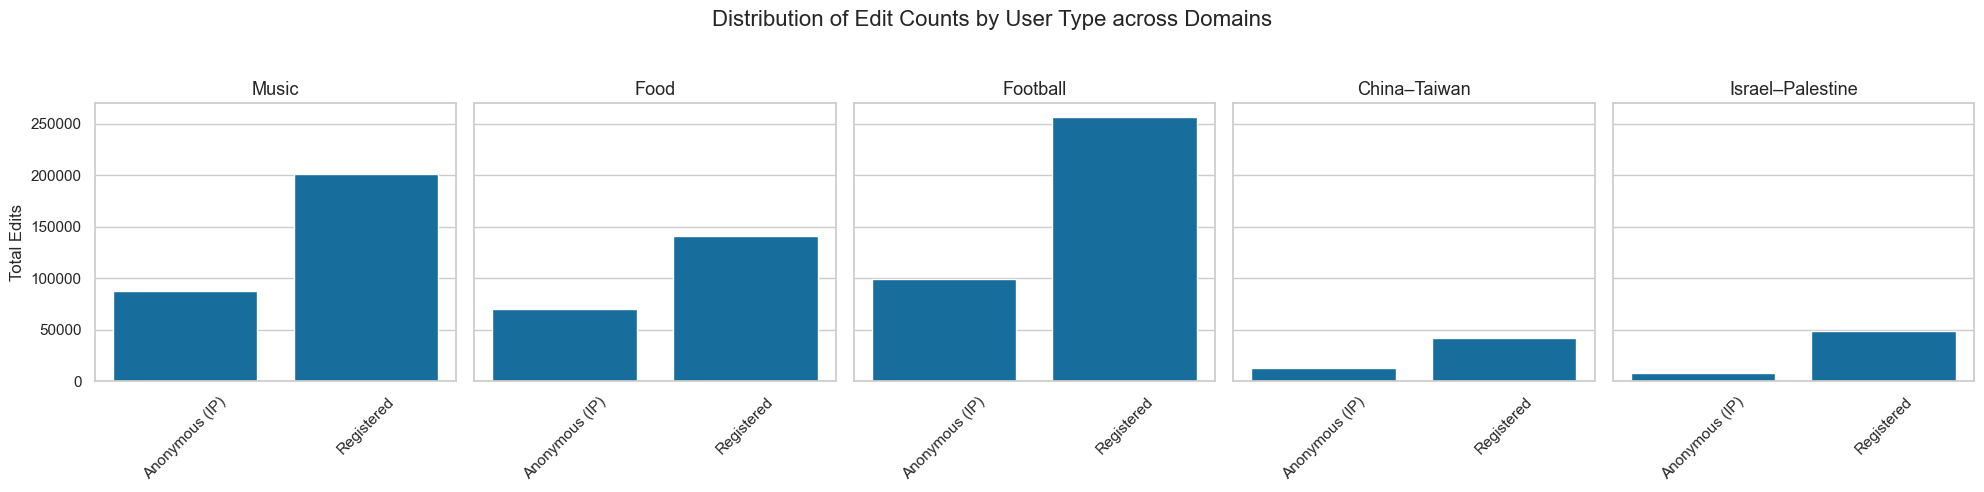

In [86]:
# === Combine in a dict for looping ===
dfs = {
    "Music": df_music,
    "Food": df_food,
    "Football": df_football,
    "China–Taiwan": df_china,
    "Israel–Palestine": df_israel
}

# === Visualization setup ===
sns.set(style="whitegrid", palette="colorblind")
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
fig.suptitle("Distribution of Edit Counts by User Type across Domains", fontsize=16)

for ax, (topic, df) in zip(axes, dfs.items()):
    # Compute group stats
    class_counts = (
        df.groupby("user_type")["edit_count"]
        .sum()
        .reset_index()
    )

    # Sort for consistency
    class_counts = class_counts.sort_values("user_type")

    # Plot on each subplot
    sns.barplot(
        data=class_counts,
        x="user_type",
        y="edit_count",
        ax=ax
    )

    ax.set_title(topic, fontsize=13)
    ax.set_xlabel("")
    ax.set_ylabel("Total Edits" if ax == axes[0] else "")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # space for the title
plt.show()

In [111]:
import requests
import csv
import time
import re

# === CONFIG ===
WIKI_API = "https://en.wikipedia.org/w/api.php"
SLEEP_BETWEEN = 0.5  # polite pause between requests
USER_AGENT = "DH_Project/1.0 (https://www.epfl.ch/labs/dhlab/; maxime.garambois@epfl.ch)"

# === Helper Functions ===
def is_ip(user):
    """Detect if username looks like an IP address."""
    return bool(re.match(r"^\d{1,3}(\.\d{1,3}){3}$", user))


def fetch_all_revisions(title):
    """Fetch all revision metadata (user, timestamp, comment...) for a given Wikipedia article title."""
    session = requests.Session()
    session.headers.update({"User-Agent": USER_AGENT})

    params = {
        "action": "query",
        "format": "json",
        "prop": "revisions",
        "titles": title,
        "rvprop": "ids|user|timestamp|comment",
        "rvlimit": "500",            # Max per request
        "formatversion": "2",
        "rvslots": "main"
    }

    all_revs = []
    cont = {}

    while True:
        if cont:
            params.update(cont)
        resp = session.get(WIKI_API, params=params, timeout=30)
        resp.raise_for_status()

        # --- Defensive JSON decoding ---
        try:
            data = resp.json()
        except Exception as e:
            print(f"⚠️ JSON decode error for {title}: {e}")
            print(resp.text[:300])
            break

        pages = data.get("query", {}).get("pages", [])
        if not pages:
            break

        page = pages[0]
        revs = page.get("revisions", []) or []
        for r in revs:
            r["article_title"] = title
        all_revs.extend(revs)

        # --- Continuation handling ---
        if "continue" in data:
            cont = data["continue"]
            time.sleep(SLEEP_BETWEEN)
        else:
            break

    return all_revs


# === DICTIONARY OF ARTICLE SETS ===
dicti = {
    "music": article_names_music[::5],
    "food": article_names_food[::5],
    "football": article_names_football[::5],
    "china-taiwan": article_names_china_taiwan_cut,
    "israel-palestine": article_names_israel_palestine_cut
}


# === MAIN FUNCTION ===
def go(article_list, name):
    OUT_CSV = f"wiki_revisions_{name}.csv"

    with open(OUT_CSV, "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["article_title", "rev_id", "username", "user_type", "timestamp", "comment"])

        for title in article_list:
            print(f"\nFetching revisions for: {title}")
            revisions = fetch_all_revisions(title)
            print(f"  → Got {len(revisions)} revisions")

            for r in revisions:
                user = r.get("user", "(unknown)")
                user_type = "Anonymous (IP)" if is_ip(user) else "Registered"
                rev_id = r.get("revid", "")
                timestamp = r.get("timestamp", "")
                comment = r.get("comment", "").replace("\n", " ").strip()
                writer.writerow([title, rev_id, user, user_type, timestamp, comment])

    print(f"\n✅ Wrote all revision metadata to {OUT_CSV}")


# === EXECUTION LOOP ===
for key, val in dicti.items():
    print(f"\n===== Processing category: {key.upper()} =====")
    go(val, key)


===== Processing category: MUSIC =====

Fetching revisions for: Pop music
  → Got 9650 revisions

Fetching revisions for: Swing
  → Got 406 revisions

Fetching revisions for: Country music
  → Got 8477 revisions

Fetching revisions for: Daft Punk
  → Got 8942 revisions

Fetching revisions for: Marshall Amplification
  → Got 1483 revisions

Fetching revisions for: Piano
  → Got 7927 revisions

Fetching revisions for: SCH (rapper)
  → Got 531 revisions

Fetching revisions for: AC/DC
  → Got 17414 revisions

Fetching revisions for: Stevie Wonder
  → Got 5817 revisions

✅ Wrote all revision metadata to wiki_revisions_music.csv

===== Processing category: FOOD =====

Fetching revisions for: Food
  → Got 5027 revisions

Fetching revisions for: Recipe
  → Got 1710 revisions

Fetching revisions for: Egg
  → Got 3221 revisions

Fetching revisions for: Pizza
  → Got 7596 revisions

Fetching revisions for: Hamburger
  → Got 8261 revisions

Fetching revisions for: Barbecue
  → Got 3931 revisions
